In [1]:
import os
import pickle
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from numpy import nan

In [2]:
files_minus8 = [x for x in os.listdir('lethal_defection_betaminus8/') if 'results' in x]

In [3]:
with open('lethal_defection_betaminus8/paramgrid_newparams_a03.txt','rb') as f:
    param_grid = pickle.load(f)

In [5]:
all_results_minus8 = []
for file in files_minus8:
    with open('lethal_defection_betaminus8/'+file, 'rb') as f:
        result_file = pickle.load(f)
        for r in result_file['results']:
            all_results_minus8.append(r)
            
result_df_minus8 = pd.DataFrame(all_results_minus8)

In [6]:
along_m = sorted(list(set(result_df_minus8['m'])))
along_n = sorted(list(set(result_df_minus8['n'])))
along_ap = sorted(list(set(result_df_minus8['ap'])))
along_ttr = sorted(list(set(result_df_minus8['ttr'])))
along_qd = sorted(list(set(result_df_minus8['qd'])))
along_m.remove(20000)
along_ap.remove(7.8)
along_ttr.remove(5)
along_qd.remove(1-3e-6)
along_n.remove(87)
all_along_params = [('m',along_m), ('n',along_n), ('ap',along_ap), ('ttr',along_ttr), ('qd',along_qd)]
all_names_params = ['m', 'n', 'ap', 'ttr', 'qd']

In [7]:
all_colormap_params = list(combinations(all_along_params, 2))
all_colormap_names = list(combinations(all_names_params,2))

In [8]:
dict_other_vals = {'m':20000, 'n':87, 'ap': 7.8, 'qd':1-3e-6, 'ttr':5}

In [9]:
result_df_minus8

,m,n,beta,ap,qd,ttr,Y_control,Y_treatment
0,1500.000000,1.000000,1.000000e-08,7.700000,0.999999,0.000000,5.597833e+06,5.597833e+06
1,1500.000000,1.000000,1.000000e-08,7.700000,0.999999,0.736842,5.597833e+06,5.597833e+06
2,1500.000000,1.000000,1.000000e-08,7.700000,0.999999,1.473684,5.597833e+06,5.597833e+06
3,1500.000000,1.000000,1.000000e-08,7.700000,0.999999,2.210526,5.597833e+06,5.597833e+06
4,1500.000000,1.000000,1.000000e-08,7.700000,0.999999,2.947368,5.597833e+06,5.597833e+06
...,...,...,...,...,...,...,...,...
4084096,8973.684211,631.947368,1.000000e-08,7.815789,0.999997,11.789474,4.667038e+08,4.473691e+08
4084097,8973.684211,631.947368,1.000000e-08,7.815789,0.999997,12.526316,4.667038e+08,4.504451e+08
4084098,8973.684211,631.947368,1.000000e-08,7.815789,0.999997,13.263158,4.667038e+08,4.529766e+08
4084099,8973.684211,631.947368,1.000000e-08,7.815789,0.999997,14.000000,4.667038e+08,4.550799e+08


In [10]:
all_matrices_for_cmap_minus8 = []

for comb in all_colormap_params:
    params_axes = (comb[0][0], comb[1][0])
    print(params_axes)
    other_params = set(all_names_params)-set(params_axes)

    colormap_params = np.zeros((len(comb[0][1]), len(comb[1][1])))
    
    for xind in range(len(comb[0][1])):
        for yind in range(len(comb[0][1])):
            df_axes = result_df_minus8.copy()
            for p in other_params:
                df_axes = df_axes[df_axes[p] == dict_other_vals[p]]
            df_axes = df_axes[(df_axes[params_axes[0]] == comb[0][1][xind])&(df_axes[params_axes[1]] == comb[1][1][yind])]
            colormap_params[xind, yind] = list(df_axes['Y_treatment'])[0]/list(df_axes['Y_control'])[0]
            
    all_matrices_for_cmap_minus8.append(colormap_params)


('m', 'n')
('m', 'ap')
('m', 'ttr')
('m', 'qd')
('n', 'ap')
('n', 'ttr')
('n', 'qd')
('ap', 'ttr')
('ap', 'qd')
('ttr', 'qd')


In [11]:
indices_colormaps = []
for i in range(5):
    for j in range(2):
        indices_colormaps.append((i,j))
indices_colormaps = dict(zip(range(10), indices_colormaps))

In [12]:
def calculate_ticks(ticklabels, truerange, tickrange):
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

def calculate_ticks_log(ticklabels, truerange, tickrange):
    tick_labels = np.log(ticklabels)
    true_range = np.log(truerange)
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

param_ticks = {'m':[1500,5000,10000,15000,20000,25000,29900],
               'n':[1,200,400,600,800,1000],
               'ap':[7.7,8.0,8.3,8.6,8.8],
               'qd':[1-1e-6,1-3e-6,1-5e-6,1-7.5e-6,1-1e-5], 
               'ttr':[0,3,7,10,14]}
param_ranges = {'m':[1500,29900],
                'n':[1,1000],
                'ap':[7.7,8.8],
                'qd':[1e-6,1e-5],
                'ttr':[0,14]}

In [14]:
all_xticks, all_yticks = [],[]
all_xticklabels, all_yticklabels = [],[]

for i in range(10):
    
    x_param, y_param = all_colormap_names[i]

    if y_param == 'qd':
        ticks_y = calculate_ticks_log(1-np.array(param_ticks[y_param]), param_ranges[y_param], [0,19])
    else:
        ticks_y = calculate_ticks(np.array(param_ticks[y_param]), param_ranges[y_param], [0,19])
        
    if y_param == 'qd':
        labels_y = list(["{:.1e}".format(1-x) for x in np.array(param_ticks[y_param])])
    elif y_param == 'ap':
        labels_y = [np.round(x,2) for x in param_ticks[y_param]]
    else:
        labels_y = [int(np.round(x)) for x in param_ticks[y_param]]
        
    if x_param == 'qd': 
        ticks_x = 19-np.array(calculate_ticks_log(1-np.array(param_ticks[x_param]), param_ranges[x_param], [0,19])[::-1])
    else:
        ticks_x = 19-np.array(calculate_ticks(np.array(param_ticks[x_param]), param_ranges[x_param], [0,19])[::-1])
            

    if x_param == 'qd':
        labels_x = list(["{:.1e}".format(1-x) for x in np.array(param_ticks[x_param])])
    elif x_param == 'ap':
        labels_x = [np.round(x,2) for x in param_ticks[x_param]]
    else:
        labels_x = [int(np.round(x)) for x in param_ticks[x_param]]
    
    
    all_xticks.append(ticks_x)
    all_yticks.append(ticks_y)
    all_xticklabels.append(labels_x)
    all_yticklabels.append(labels_y)

In [15]:
params_description = {'m':'Number of lethal positions $m$',
                      'n':'Number of gain-of-function positions $n$',
                      'ap': 'Clearance rate in clearance phase $a_1$',
                      'qd': 'Viral mutation rate under treatment $u_1$',
                      'ttr': 'Time of start of treatment'}

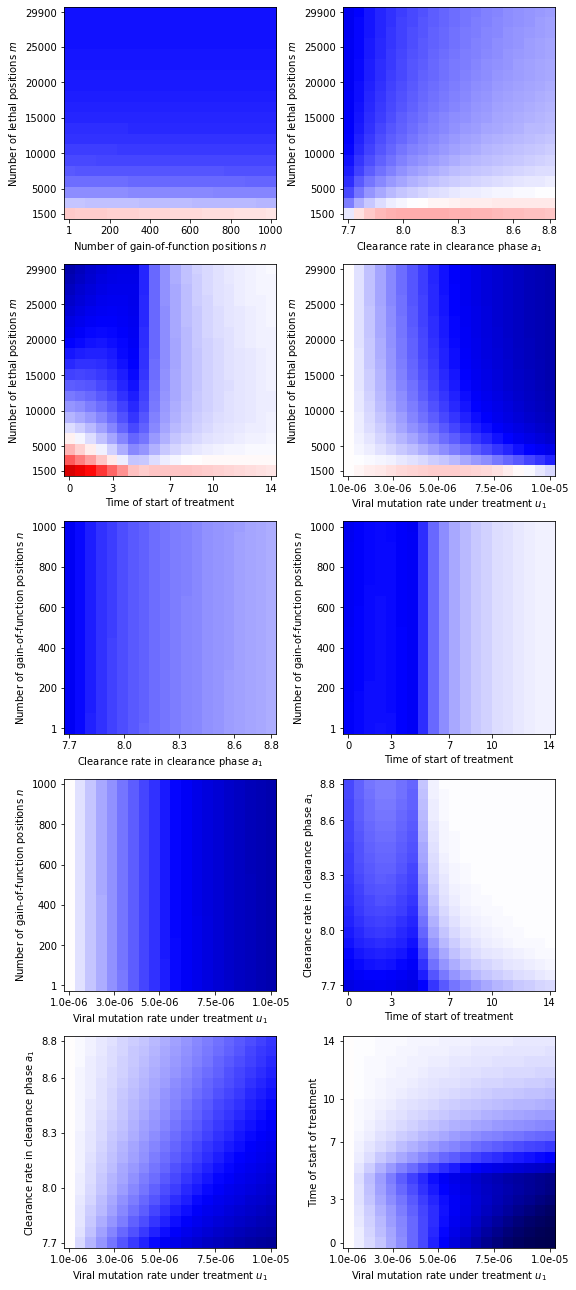

In [17]:
fig, ax = plt.subplots(5,2,figsize=(8,18))

for i in range(10):
    im = ax[indices_colormaps[i]].imshow(all_matrices_for_cmap_minus8[i][::-1], cmap = 'seismic', vmin = 0., vmax = 2)
    if all_colormap_params[i][1][0] in ['qd']:
        im = ax[indices_colormaps[i]].imshow(np.flip(all_matrices_for_cmap_minus8[i][::-1],1), cmap = 'seismic', vmin = 0., vmax = 2)

    ax[indices_colormaps[i]].set_xticks(all_yticks[i])
    ax[indices_colormaps[i]].set_xticklabels(all_yticklabels[i])
    
    ax[indices_colormaps[i]].set_yticks(all_xticks[i])
    ax[indices_colormaps[i]].set_yticklabels(all_xticklabels[i][::-1])    
    
    
    ax[indices_colormaps[i]].set_ylabel(params_description[all_colormap_params[i][0][0]])
    ax[indices_colormaps[i]].set_xlabel(params_description[all_colormap_params[i][1][0]])
    
    
plt.tight_layout(pad=1.0)
plt.savefig('betaminus8_lethaldefection_7FEB.jpg', dpi = 600, bbox_inches = 'tight')

In [ ]:
all_matrices_for_cmap_minus8

In [ ]:
3511+56+14705

In [ ]:
18727-9261*2

<ipython-input-35-ae5034f497ff>:6: UserWarning: Use the colorbar set_ticks() method instead.
  cbar.ax.set_yticks(np.arange(0,2.01,0.25))
<ipython-input-35-ae5034f497ff>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(list(np.arange(0,2,0.25)) + ['> 2.00'], fontsize = 14)


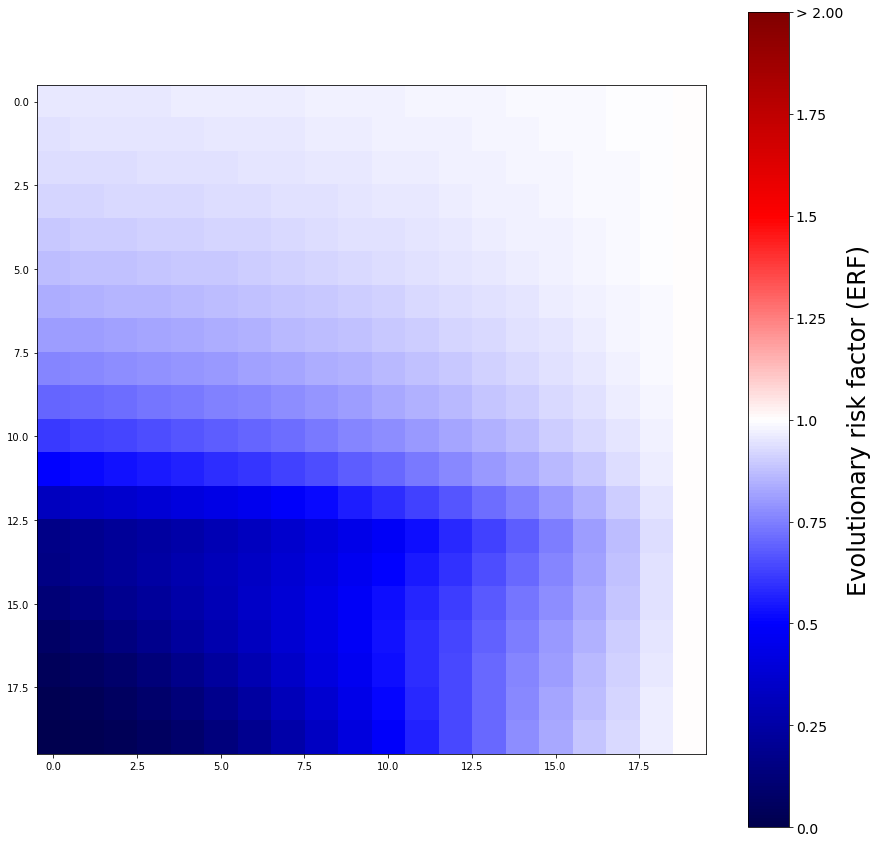

In [35]:
fig, ax = plt.subplots(figsize = (15,15))

plt.imshow(all_matrices_for_cmap_minus8[i][::-1], cmap = 'seismic', vmin = 0., vmax = 2)

cbar = plt.colorbar()
cbar.ax.set_yticks(np.arange(0,2.01,0.25))
cbar.ax.set_yticklabels(list(np.arange(0,2,0.25)) + ['> 2.00'], fontsize = 14)
cbar.ax.set_ylabel('Evolutionary risk factor (ERF)', fontsize = 24)
plt.savefig('cbar_cmap_lethaldefection_7FEB.jpg', dpi = 600, bbox_inches = 'tight')

In [26]:
len(list(np.arange(0,2,0.25)) + ['> 2.00'])

9

In [27]:
len(np.arange(0,2.01,0.25))

9

In [36]:
files_minus7 = [x for x in os.listdir('lethal_defection_betaminus7/') if 'results' in x]
with open('lethal_defection_betaminus7/paramgrid_newparams_a03.txt','rb') as f:
    param_grid = pickle.load(f)
all_results_minus7 = []
for file in files_minus7:
    with open('lethal_defection_betaminus7/'+file, 'rb') as f:
        result_file = pickle.load(f)
        for r in result_file['results']:
            all_results_minus7.append(r)
            
result_df_minus7 = pd.DataFrame(all_results_minus7)

In [38]:
all_matrices_for_cmap_minus7 = []

for comb in all_colormap_params:
    params_axes = (comb[0][0], comb[1][0])
    print(params_axes)
    other_params = set(all_names_params)-set(params_axes)

    colormap_params = np.zeros((len(comb[0][1]), len(comb[1][1])))
    
    for xind in range(len(comb[0][1])):
        for yind in range(len(comb[0][1])):
            df_axes = result_df_minus7.copy()
            for p in other_params:
                df_axes = df_axes[df_axes[p] == dict_other_vals[p]]
            df_axes = df_axes[(df_axes[params_axes[0]] == comb[0][1][xind])&(df_axes[params_axes[1]] == comb[1][1][yind])]
            colormap_params[xind, yind] = list(df_axes['Y_treatment'])[0]/list(df_axes['Y_control'])[0]
            
    all_matrices_for_cmap_minus7.append(colormap_params)


('m', 'n')
('m', 'ap')
('m', 'ttr')
('m', 'qd')
('n', 'ap')
('n', 'ttr')
('n', 'qd')
('ap', 'ttr')
('ap', 'qd')
('ttr', 'qd')


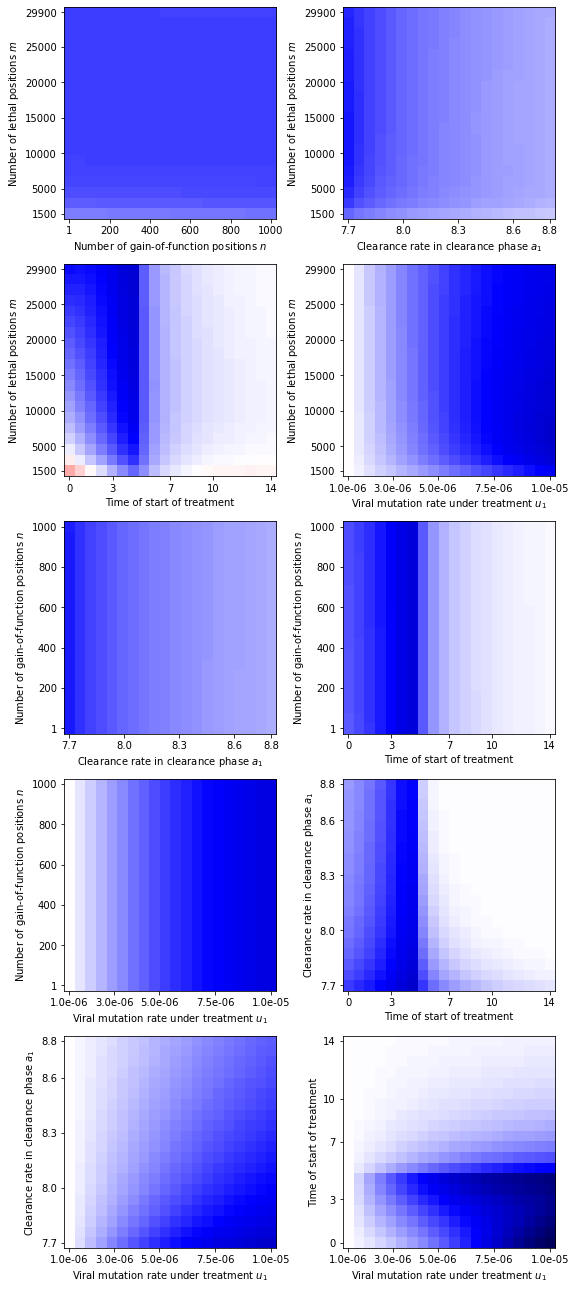

In [39]:
fig, ax = plt.subplots(5,2,figsize=(8,18))

for i in range(10):
    im = ax[indices_colormaps[i]].imshow(all_matrices_for_cmap_minus7[i][::-1], cmap = 'seismic', vmin = 0., vmax = 2)
    if all_colormap_params[i][1][0] in ['qd']:
        im = ax[indices_colormaps[i]].imshow(np.flip(all_matrices_for_cmap_minus7[i][::-1],1), cmap = 'seismic', vmin = 0., vmax = 2)

    ax[indices_colormaps[i]].set_xticks(all_yticks[i])
    ax[indices_colormaps[i]].set_xticklabels(all_yticklabels[i])
    
    ax[indices_colormaps[i]].set_yticks(all_xticks[i])
    ax[indices_colormaps[i]].set_yticklabels(all_xticklabels[i][::-1])    
    
    
    ax[indices_colormaps[i]].set_ylabel(params_description[all_colormap_params[i][0][0]])
    ax[indices_colormaps[i]].set_xlabel(params_description[all_colormap_params[i][1][0]])
    
    
plt.tight_layout(pad=1.0)
plt.savefig('betaminus7_lethaldefection_7FEB.jpg', dpi = 600, bbox_inches = 'tight')